# Importing the libraries

In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Getting and loading the Training and Testing set

In [2]:
path = r"C:\AI-DocHelper_Models_Code\Malaria_Detection\dataset"

In [3]:
batch_size = 16
img_size = (134, 134)

In [4]:
image_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range=40.,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2, 
                                  horizontal_flip=True,
                                  fill_mode="nearest",
                                  validation_split=0.2)

In [5]:
train_generator = image_datagen.flow_from_directory(path,
                                                   target_size=img_size,
                                                   batch_size=batch_size,
                                                   class_mode="binary",
                                                   subset="training",
                                                   shuffle=True)

validation_generator = image_datagen.flow_from_directory(path,
                                                        target_size=img_size,
                                                        batch_size=batch_size,
                                                        class_mode="binary",
                                                        subset="validation",
                                                        shuffle=False)

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


# Getting the class names

In [6]:
temp_classes = dict(train_generator.class_indices)

classes = dict()
for (k, v) in temp_classes.items():
    classes[v] = k
print(classes)

{0: 'Parasitized', 1: 'Uninfected'}


# Building the CNN

## Initalising the CNN

In [7]:
model = Sequential()

## Adding the layers

### Adding the First Convolutional and Pooling layers

model.add(Conv2D(32, (3, 3), input_shape = (img_size[0], img_size[1], 3), activation = "relu", padding="same"))
model.add(MaxPooling2D(pool_size = (2, 2)))

### Adding the Second Convolutional and Pooling layers

model.add(Conv2D(64, (3, 3), input_shape = (img_size[0], img_size[1], 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size = (2, 2)))

### Adding the Third Convolutional and Pooling layers

model.add(Conv2D(128, (3, 3), input_shape = (img_size[0], img_size[1], 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size = (2, 2)))

### Adding the Forth Convolutional and Pooling layers

model.add(Conv2D(128, (3, 3), input_shape = (img_size[0], img_size[1], 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size = (2, 2)))

### Adding the Fifth Convolutional and Pooling layers

model.add(Conv2D(256, (3, 3), input_shape = (img_size[0], img_size[1], 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size = (2, 2)))

## Adding the Sixth Convolutional and Pooling layers

model.add(Conv2D(256, (3, 3), input_shape = (img_size[0], img_size[1], 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size = (2, 2)))

## Adding the Seventh Convolutional and Pooling layers

model.add(Conv2D(512, (3, 3), input_shape = (img_size[0], img_size[1], 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size = (2, 2)))

## Adding VGG16 as the model base

In [8]:
from tensorflow.keras.applications import VGG16

In [9]:
vgg16 = VGG16(input_shape=(img_size[0], img_size[1], 3),
             include_top = False,
             weights="imagenet")

In [10]:
for layer in vgg16.layers:
    layer.trainable= False

In [11]:
model.add(vgg16)

## Flattening all the layers

In [12]:
model.add(Flatten())

## Adding the First Fully Connected Layer

In [13]:
model.add(Dense(units=512, activation="relu"))

## Adding a Dropout layer

In [14]:
model.add(Dropout(rate=0.5))

## Adding the Final Fully Connected Layer

In [15]:
model.add(Dense(units=1, activation="sigmoid"))

## Diaplaying the model summary

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 18,910,017
Trainable params: 4,195,329
Non-trainable params: 14,714,688
_________________________________________________________________


# Compiling the CNN

In [17]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])

# Training the CNN

## Saving the best model only

In [18]:
checkpoint = ModelCheckpoint(filepath="malaria.h5",
                            save_best_only=True)

## Stop the training, if there is no improvement

In [19]:
earlyStopping = EarlyStopping(monitor="val_loss",
                             patience=10,
                             restore_best_weights=True,
                             verbose=1)

## Calculating the steps_per_epoch and valiadtion_steps

In [20]:
import math

batch_size=batch_size
training_size = 22048 
validation_size = 5510

compute_steps_per_epoch = lambda x : int(math.ceil(1. * x / batch_size))

steps_per_epoch = compute_steps_per_epoch(training_size)
valiadtion_steps = compute_steps_per_epoch(validation_size)

print(steps_per_epoch)
print(valiadtion_steps)

1378
345


In [21]:
history = model.fit(train_generator,
                   steps_per_epoch=steps_per_epoch,
                    epochs=30,
                   validation_data=validation_generator,
                   validation_steps=valiadtion_steps,
                   callbacks=[checkpoint, earlyStopping])

Epoch 1/30
1378/1378 [==============================] - 1329s 964ms/step - loss: 0.5508 - accuracy: 0.7750 - val_loss: 0.3597 - val_accuracy: 0.8432
Epoch 2/30
1378/1378 [==============================] - 1303s 946ms/step - loss: 0.3504 - accuracy: 0.8557 - val_loss: 0.3419 - val_accuracy: 0.8586
Epoch 3/30
1378/1378 [==============================] - 1334s 968ms/step - loss: 0.3206 - accuracy: 0.8704 - val_loss: 0.2913 - val_accuracy: 0.8753
Epoch 4/30
1378/1378 [==============================] - 1339s 972ms/step - loss: 0.3146 - accuracy: 0.8771 - val_loss: 0.2751 - val_accuracy: 0.8833
Epoch 5/30
1378/1378 [==============================] - 1448s 1s/step - loss: 0.3004 - accuracy: 0.8848 - val_loss: 0.2666 - val_accuracy: 0.8918
Epoch 6/30
1378/1378 [==============================] - 1398s 1s/step - loss: 0.3006 - accuracy: 0.8803 - val_loss: 0.2975 - val_accuracy: 0.8920
Epoch 7/30
1378/1378 [==============================] - 1319s 958ms/step - loss: 0.2928 - accuracy: 0.8874 - val

# Saving the model

In [22]:
model_json = model.to_json()

with open("malaria.json", "w") as json_file :
    json_file.write(model_json)

# Visualizing the training performance

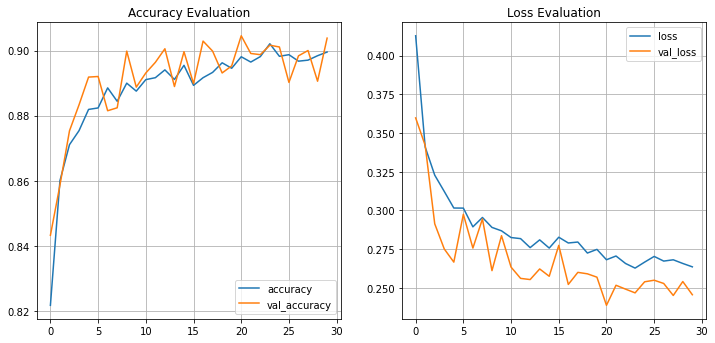

In [23]:
plt.figure(figsize = (12, 12))

plt.subplot(2, 2, 1)
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.legend()
plt.grid()
plt.title("Accuracy Evaluation")

plt.subplot(2, 2, 2)
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.grid()
plt.legend()
plt.title("Loss Evaluation")

plt.savefig("malaria_model_history.jpg")

# Getting the accuracy for test set

In [24]:
test_accuracy = model.evaluate(validation_generator)
print(test_accuracy)

345/345 [==============================] - 300s 868ms/step - loss: 0.2420 - accuracy: 0.9049
[0.2419581413269043, 0.9049001932144165]


In [25]:
preds = model.predict(validation_generator, verbose=1)
preds

345/345 [==============================] - 297s 861ms/step


array([[3.2767653e-04],
       [6.1395764e-04],
       [1.9403696e-03],
       ...,
       [9.4033563e-01],
       [6.9176078e-01],
       [9.0697932e-01]], dtype=float32)

In [26]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

In [27]:
print(predictions)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
